# Lesson 1 Assignment - EnergyLoads
## Author - Studentname

tips from instructor: 
 - check for null value 
 - fill null with ?? or how to handle it? (zero, mean, median, some marks, or throw) flash back to last semester. How come I can forget this?????
 - replace strings in the column name, for example replace space to '_'
 - different scale of the data value, can you directly imply them? 
 - categorical data columns, if any - pandas - as.type('categorical') https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Categorical.html
 - correlation table numbers, and heating maps: https://seaborn.pydata.org/generated/seaborn.heatmap.html
 - 

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

### <font color="red"> My findings: <font>
<font color="red"> 
 - Taller buildings are less energy effiency. 
 - Buildings with 0.75 or more relative compactness cost more energy than 0.75 or less.
 - Bigger Glazing Area leads to less energy efficiency. <font>

In [122]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [124]:
my_data = pd.read_csv(fileName)

In [125]:
my_data['counts'] = 1

### Step 1: Look up Data Distribution on Energy Load 
The ['Cooling Load'] and ['Heating Load'] are both binormal distribution and right skew. From the hisogram plots, picture 1 below, they have very similar distributions, even thought Cooling Load's peaks shift slight right than Heating Load. In order to see whether heating and cooling load has similar trends for individual building records, I made the scatter plots, picture 2 below. Every building's record was represented by a dot, which X is Heating Load and Y is cooling loads. There is a clear +45 degree lines positively associate cooling with heating loads. So I came to an conclusion that the energy load could be represented as a combination of heating and cooling load. An average number of building's heating and cooling load should work. 
#### Conclusion: I decided to avearge ['Heating Load'] and ['Cooling Load'] as a new field called ['Energy Load'].

#### Histogram Ploting

(0.0, 100.0)

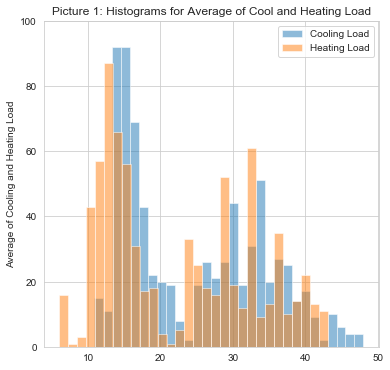

In [126]:
bins = 30
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca()
plt.hist(my_data.loc[:,'Cooling Load'], bins, alpha=0.5, label='Cooling Load')
plt.hist(my_data.loc[:,'Heating Load'], bins, alpha=0.5, label='Heating Load')
ax.legend(loc='upper right')
ax.set_title('Picture 1: Histograms for Average of Cool and Heating Load') # Give the plot a main title
ax.set_ylabel("Average of Cooling and Heating Load")# Set text for y axis
ax.set_ylim(0.0, 100.0) # Set the limits of the y axis

#### Scatter Ploting

(0.0, 50.0)

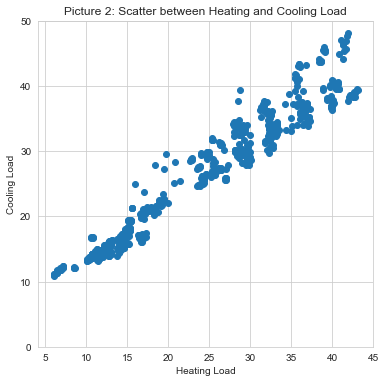

In [127]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca()
x = my_data.loc[:,'Heating Load']
y = my_data.loc[:,'Cooling Load']
plt.scatter(x, y, label='loads')
ax.set_xlabel('Heating Load')
ax.set_ylabel('Cooling Load')
ax.set_title('Picture 2: Scatter between Heating and Cooling Load')
ax.set_ylim(0.0, 50.0)

In [128]:
my_data['Energy Load'] = (my_data['Heating Load'] + my_data['Cooling Load'])/2

### Step 2: Exam Correlation Between Variables
To know the relationship between variables, I made a correlation heatingmap, Picture 3 below. From the map, the colder the color is, the higher association relationship. So we can tell the strongest correlation with Energy Load is "Overall Height". And then, the positive association comes down to "Relative Compactness", "Wall Area". Meanwhile "Surface Area" and "Roof Area" have similar stregnth coorelation with energy load, but they are on the negative direction. The "Grazing Area" is very slight positive association with Energy Load. Based on the heatingmap here, "Orientation" and "Glazing Area Distribution" have almost no associated relationship with Energy Load. 
#### Conclusion: I will look into 'Overall Height' at first. And then I will exam 'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', and 'Glazing Area'. Lastly, I will analysis categorical variables: 'Orientation' and 'Glazing Area Distribution'. 

#### Correlation Heating Map

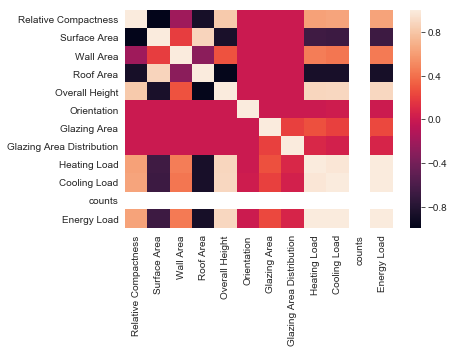

In [129]:
corr = my_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Step3: <font color="red"> Finding 1 - Taller buildings are less energy effiency. <font>
There are only two tyes of overall height building: 7.0 and 3.5. From the box plot below, the 7.0 height building's median enegry load is 33 unit loads, almost double the 3.5 height building, who only cost 15 unit loads. GIvin that 75%+ of tall buildings cost more energy than short buildinhgs. So we can conclude that taller buildings cost more energy than shorter buildings. 

#### Boxing Plot

3.5    384
7.0    384
Name: Overall Height, dtype: int64


(0.0, 50.0)

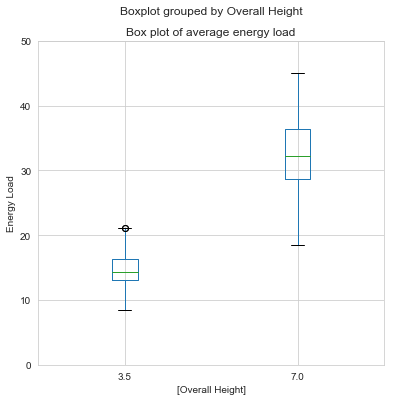

In [130]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
print (my_data['Overall Height'].value_counts())
my_data.loc[:,['Energy Load',  'Overall Height']].boxplot(by = ['Overall Height'], ax = ax)
ax.set_title('Box plot of average energy load') # Give the plot a main title
ax.set_ylabel('Energy Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

#### Create two new dataset, hosting different heights for future analysis
Because the overall heights has strong influence to energy efficiency, so I created two new data tables to seperate tall building and short building: my_data_high, my_data_low. In this way, I could analysis buildings for these two categories seperately. 

In [131]:
my_data_high = my_data[my_data['Overall Height'] == 7.0]
my_data_low = my_data[my_data['Overall Height'] == 3.5]

### Step 4: <font color="red"> Finding 2 - Buildings with 0.75 or more relative compactness cost more energy than 0.75 or less. <font>
Violin Plot picture 4 presents a rough look at relative compactness with energy load. We can conclude that all buildings, who have 0.75+  relative compactness, cost more energy than the buildings, who have less than 0.75 relative compactness. However, the relative compactness building design may heavily impacted by the overall height. Becuase all 0.75+ relative compactness buildings are marked as tall building. So I decide to look into tall buildings and short buildings seperately. 

By looking into short builings exclusively, there are clear negative trends, picture 5 below, reveals between relative compactness and surface area/wall area. It is saying higher relative compactness, the less surface and wall area. In order to elimite the association relationships from Roof area/surface/wall area, I plot these three fields out by appling group-by boxing plot method. The result turns out there is no strong relationship between  relative compactness and energy load, while analysis the short/tall building seperately. 

#### Violin Plot

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Energy Load')

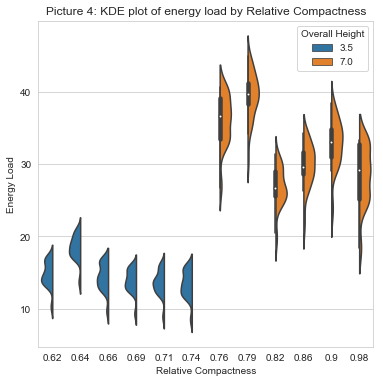

In [132]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Relative Compactness', y = 'Energy Load', hue = 'Overall Height',
               data = my_data, ax = ax, split = True)
ax.set_title('Picture 4: KDE plot of energy load by Relative Compactness') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Energy Load')# Set text for y axis

#### Scatter Plot

Text(0,0.5,'Relative Compactness')

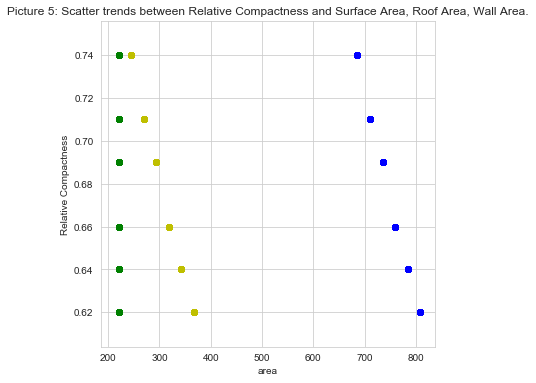

In [133]:
# the plot below shows the correlation pattern specifically for low heights building
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
y = my_data_low.loc[:,'Relative Compactness']
x1 = my_data_low.loc[:,'Surface Area']
plt.scatter(x1, y, c='b')
x2 = my_data_low.loc[:,'Wall Area']
plt.scatter(x2, y, c='y')
x3 = my_data_low.loc[:,'Roof Area']
plt.scatter(x3, y, c='g')
ax.set_title('Picture 5: Scatter trends between Relative Compactness and Surface Area, Roof Area, Wall Area.')
ax.set_xlabel('area')
ax.set_ylabel('Relative Compactness')

### Step 5: <font color="red"> Finding 3 - Bigger Glazing Area leads to less energy efficiency <font>
With bigger glazing area, the energy load are higher. From box plot picture 6, we can see there is a clear increasing trend on energy load when glazing area getting larger. Compared to relative compactness analysis in step4, the good news here is we can be more confident that the impact of glazing area on energy efficiency is not impacted by building overall height. Because from violin plot, plicture 7, the tall and short buildings are all over every glazing area groups.  


0.40    240
0.10    240
0.25    240
0.00     48
Name: Glazing Area, dtype: int64


(0.0, 50.0)

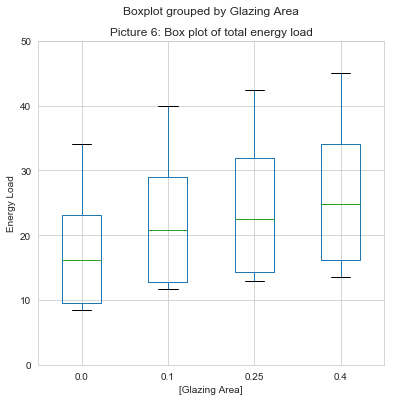

In [134]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
print (my_data['Glazing Area'].value_counts())
my_data.loc[:,['Energy Load',  'Glazing Area']].boxplot(by = ['Glazing Area'], ax = ax)
ax.set_title('Picture 6: Box plot of total energy load') # Give the plot a main title
ax.set_ylabel('Energy Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis
# my_data.loc[:,['Load', 'Orientation']].boxplot(by = ['Orientation'], ax = ax)  
# my_data.loc[:,['Load',  'Glazing Area Distribution']].boxplot(by = ['Glazing Area Distribution'], ax = ax)


c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Energy Load')

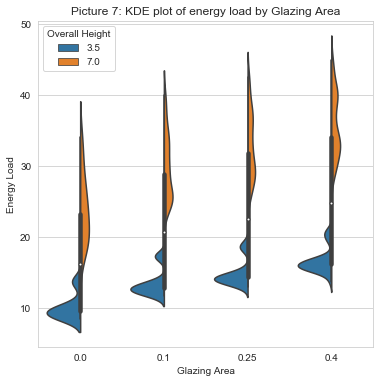

In [135]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Glazing Area', y = 'Energy Load', hue = 'Overall Height',
               data = my_data, ax = ax, split = True)
ax.set_title('Picture 7: KDE plot of energy load by Glazing Area') # Give the plot a main title
ax.set_xlabel('Glazing Area') # Set text for the x axis
ax.set_ylabel('Energy Load')# Set text for y axis

### Step 6: <font color="red"> Finding 4 - surface area (670 units) could be a threshold for energy efficiency.  <font>
From picture 8 below, With more than 670 units of surface area, the building energy load is dramatically decreased by 50%. One of the reason of this is that the building overall height shifts from tall to short.

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Energy Load')

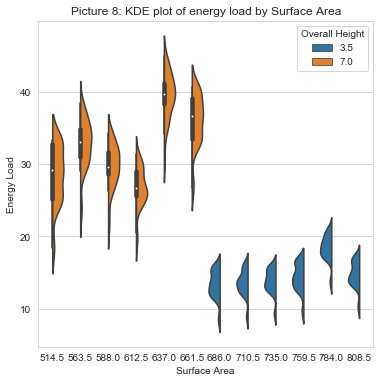

In [136]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Surface Area', y = 'Energy Load', hue = 'Overall Height',
               data = my_data, ax = ax, split = True)
ax.set_title('Picture 8: KDE plot of energy load by Surface Area') # Give the plot a main title
ax.set_xlabel('Surface Area') # Set text for the x axis
ax.set_ylabel('Energy Load')# Set text for y axis

### Step 7: The energy cost become various when the roof area is larger. 
From biolin plot picture 9, regardless the short building, which always coming with lower energy cost, more roof area the building get, the energy loads could go lower or higher. This doesn't reveal any helpful information on our topic.  

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Energy Load')

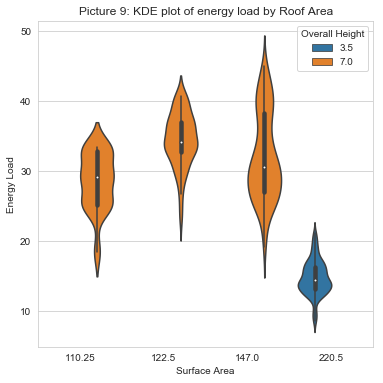

In [137]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Roof Area', y = 'Energy Load', hue = 'Overall Height',
               data = my_data, ax = ax)
ax.set_title('Picture 9: KDE plot of energy load by Roof Area') # Give the plot a main title
ax.set_xlabel('Surface Area') # Set text for the x axis
ax.set_ylabel('Energy Load')# Set text for y axis

### Step 8: There are no obvious relationship between Glazing Area Distribution/Orientation/Wall Area and energy loads
From Plots below, variables 'Orientation' / 'Glazing Area Distribution' / 'Wall Area' don't make any significant impact on Heating/Cooling load distributions.

5    192
4    192
3    192
2    192
Name: Orientation, dtype: int64


(0.0, 50.0)

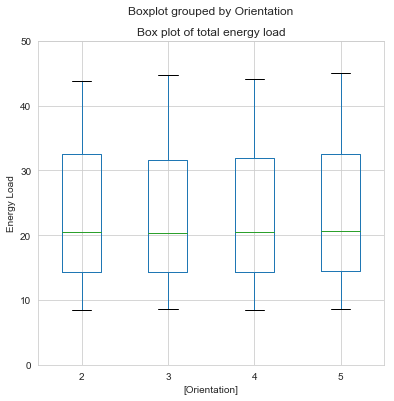

In [138]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
print (my_data['Orientation'].value_counts())
my_data.loc[:,['Energy Load', 'Orientation']].boxplot(by = ['Orientation'], ax = ax) 
ax.set_title('Box plot of total energy load') # Give the plot a main title
ax.set_ylabel('Energy Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis


5    144
4    144
3    144
2    144
1    144
0     48
Name: Glazing Area Distribution, dtype: int64


(0.0, 100.0)

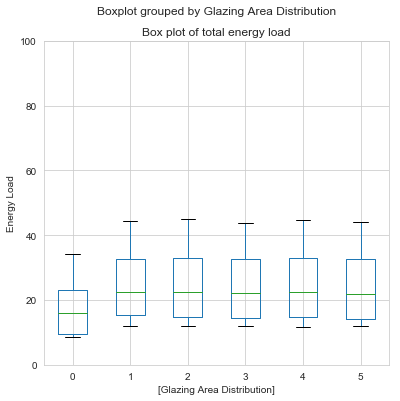

<Figure size 432x432 with 0 Axes>

In [139]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca() # Define axis 
print (my_data['Glazing Area Distribution'].value_counts())
my_data.loc[:,['Energy Load',  'Glazing Area Distribution']].boxplot(by = ['Glazing Area Distribution'], ax = ax)
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax.set_title('Box plot of total energy load') # Give the plot a main title
ax.set_ylabel('Energy Load')# Set text for y axis
ax.set_ylim(0.0, 100.0) # Set the limits of the y axis

### Wall Area with Energy Load

318.5    192
294.0    192
343.0    128
367.5     64
245.0     64
269.5     64
416.5     64
Name: Wall Area, dtype: int64


(0.0, 50.0)

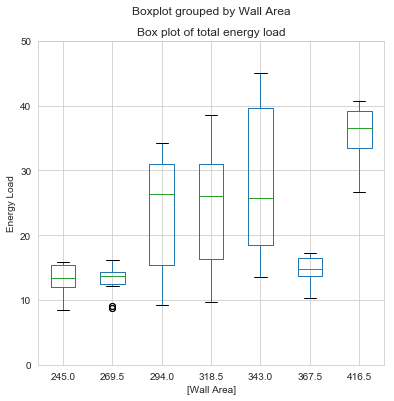

In [140]:
fig = plt.figure(figsize=(6,6)) # Define plot area
ax = fig.gca() # Define axis 
print (my_data['Wall Area'].value_counts())
my_data.loc[:,['Energy Load',  'Wall Area']].boxplot(by = ['Wall Area'], ax = ax)
ax.set_title('Box plot of total energy load') # Give the plot a main title
ax.set_ylabel('Energy Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

In [142]:
print ('analysis finsihed')

analysis finsihed
